In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

        


In [ ]:
# https://drive.google.com/uc?id=1OIsB4KWW429YJuwTMirBh8Y0jUbWwHwl # Link de descarga para el `train`
# https://drive.google.com/uc?id=1m0CDh7iom9OohCpumZLsuM4qGixartab # Link de descarga para el `test`
# https://drive.google.com/uc?id=19kVehCVH3L77Rw93kHznZ2btyhC5B-zO # Link de descarga para el `sample_submission`

# Lectura de la base de datos

La base de datos está alojada en el servidor de google drive educativo del estudiante Luis Sanchez, el acceso lo hemos configurado para que la lectura sea pública, y los datos serán guardados en las variables `train`, `test` y `sample_submission`.

In [ ]:
train = pd.read_csv('https://drive.google.com/uc?id=1OIsB4KWW429YJuwTMirBh8Y0jUbWwHwl', index_col='id')
test = pd.read_csv('https://drive.google.com/uc?id=1m0CDh7iom9OohCpumZLsuM4qGixartab', index_col='id')
sample_submission = pd.read_csv('https://drive.google.com/uc?id=19kVehCVH3L77Rw93kHznZ2btyhC5B-zO', index_col='id')

In [ ]:
train

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,
0,A,I,A,B,B,BI,A,S,Q,A,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,A,I,A,A,E,BI,K,W,AD,F,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,A,K,A,A,E,BI,A,E,BM,L,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,A,I,G,B,E,BI,C,G,Q,A,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,A,N,F,A,E,BU,A,AS,K,A,...,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007,0
499995,A,K,A,A,G,BI,A,K,AE,E,...,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939,0
499996,A,G,M,A,H,BI,C,L,F,A,...,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144,1


In [ ]:
test

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
id,,,,,,,,,,,,,,,,,,,,,
5,A,F,A,A,F,BI,A,AH,AX,A,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
6,A,H,C,A,E,AB,I,F,N,A,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
8,A,N,C,A,F,AB,A,AH,BC,A,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
9,B,L,C,A,F,BI,A,E,AX,A,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
11,A,F,A,B,F,BI,A,AH,I,A,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499983,A,N,A,D,F,BI,A,AF,AX,A,...,0.361426,0.351946,0.327670,0.205547,0.679195,0.485967,0.319130,0.520681,0.519545,0.427119
499984,B,I,A,B,E,BI,A,AS,S,E,...,0.551106,0.628843,0.677765,0.624935,0.555306,0.242424,0.700829,0.531728,0.528427,0.922645
499987,A,L,D,A,H,BI,A,AN,J,A,...,0.812384,0.803348,0.324762,0.665624,0.488447,0.853213,0.578641,0.811941,0.537106,0.531758


In [ ]:
sample_submission

,target
id,
5,0.5
6,0.5
8,0.5
9,0.5
11,0.5
...,...
499983,0.5
499984,0.5
499987,0.5



# Exploración de la variable objetivo

In [ ]:
train.shape, sample_submission.shape

((300000, 31), (200000, 1))

In [ ]:
## KEEPOUTPUT
k = train.isna().sum()
k[k!=0]

Series([], dtype: int64)

In [ ]:
l = sample_submission.isna().sum()
l[l!=0]

Series([], dtype: int64)

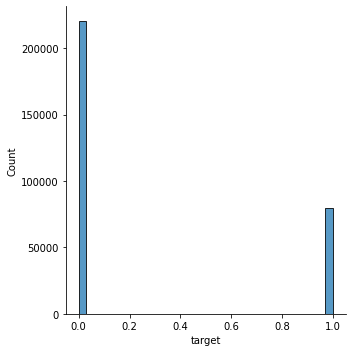

In [ ]:
import seaborn as sns
sns.displot(train['target']);

In [ ]:


train.isnull().sum()



cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
target    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


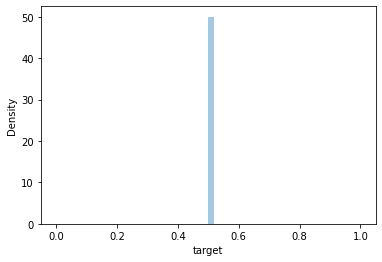

In [ ]:
sns.distplot(sample_submission['target']);

# Exploración

In [ ]:
train.columns, test.columns, sample_submission.columns

(Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
        'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16',
        'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
        'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target'],
       dtype='object'),
 Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
        'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16',
        'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
        'cont6', 'cont7', 'cont8', 'cont9', 'cont10'],
       dtype='object'),
 Index(['target'], dtype='object'))

In [ ]:
## KEEPOUTPUT
for c in train.columns:
    print ("%20s"%c, train[c].dtype)

                cat0 object
                cat1 object
                cat2 object
                cat3 object
                cat4 object
                cat5 object
                cat6 object
                cat7 object
                cat8 object
                cat9 object
               cat10 object
               cat11 object
               cat12 object
               cat13 object
               cat14 object
               cat15 object
               cat16 object
               cat17 object
               cat18 object
               cont0 float64
               cont1 float64
               cont2 float64
               cont3 float64
               cont4 float64
               cont5 float64
               cont6 float64
               cont7 float64
               cont8 float64
               cont9 float64
              cont10 float64
              target int64


In [ ]:
## KEEPOUTPUT
train._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
cont0,300000.0,0.504749,0.206788,-0.049562,0.344985,0.479650,0.637657,1.004559
cont1,300000.0,0.494073,0.213037,0.084480,0.317363,0.463170,0.693992,1.009958
cont2,300000.0,0.516632,0.214851,0.094493,0.326047,0.471247,0.704625,1.016600
cont3,300000.0,0.474235,0.216636,-0.045316,0.292249,0.387564,0.644950,0.952187
cont4,300000.0,0.504848,0.227474,0.168071,0.279303,0.479858,0.725779,0.858578
cont5,300000.0,0.502257,0.241243,-0.036379,0.276442,0.554768,0.735225,0.853022
cont6,300000.0,0.488229,0.211335,0.005199,0.323914,0.518089,0.608537,0.966553
cont7,300000.0,0.501739,0.203496,0.090901,0.353054,0.435404,0.642023,1.035818
cont8,300000.0,0.488074,0.179048,0.024139,0.358915,0.410908,0.612725,1.055885
cont9,300000.0,0.469496,0.194516,0.214866,0.309934,0.407477,0.586793,1.005652


In [ ]:
import seaborn as sns
## KEEPOUTPUT
cols = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16',
       'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target']
# cols = np.unique(list(np.random.permutation(d._get_numeric_data().columns)[:5])+['target'])
# sns.set()
# sns.pairplot(train[cols])

# Nueva sección

In [ ]:
# Obetener los datos




In [ ]:
from collections import Counter
print(Counter(train['cat0']))
print(Counter(train['cat1']))
print(Counter(train['cat2']))
print(Counter(train['cat3']))
print(Counter(train['cat4']))
print(Counter(train['cat5']))
print(Counter(train['cat6']))
print(Counter(train['cat7']))



Counter({'A': 223525, 'B': 76475})
Counter({'I': 90809, 'F': 43818, 'K': 41870, 'L': 31891, 'H': 17257, 'N': 13231, 'M': 11354, 'G': 11248, 'A': 10547, 'J': 10036, 'O': 8740, 'B': 6847, 'C': 1703, 'D': 414, 'E': 235})
Counter({'A': 168694, 'C': 38875, 'D': 22720, 'G': 18225, 'Q': 10901, 'F': 9877, 'J': 9102, 'M': 8068, 'I': 5287, 'L': 3997, 'O': 2749, 'N': 340, 'H': 219, 'B': 218, 'S': 197, 'U': 166, 'R': 129, 'K': 126, 'E': 110})
Counter({'A': 187251, 'B': 79951, 'C': 15957, 'D': 8676, 'E': 3318, 'F': 2489, 'K': 846, 'G': 372, 'L': 292, 'J': 286, 'H': 274, 'I': 177, 'N': 111})
Counter({'E': 129385, 'F': 76678, 'G': 30754, 'D': 27919, 'H': 23388, 'J': 4307, 'I': 3241, 'K': 1481, 'M': 547, 'C': 506, 'O': 330, 'B': 301, 'S': 285, 'T': 215, 'L': 214, 'Q': 117, 'P': 100, 'A': 92, 'N': 81, 'R': 59})
Counter({'BI': 238563, 'AB': 41639, 'BU': 6740, 'K': 2713, 'G': 683, 'BQ': 483, 'N': 447, 'CL': 336, 'AL': 272, 'BO': 239, 'AY': 237, 'CI': 219, 'BA': 209, 'AW': 205, 'M': 203, 'AT': 194, 'R': 1

In [ ]:
# Este ciclo for cambia las letras por números

for c in train.columns:
    if train[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(train[c].values)
        test[c] = lbl.transform(test[c].values)
        
display(train.head())



,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,8,0,1,1,33,0,44,54,0,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,0,8,0,0,4,33,8,48,3,5,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,0,10,0,0,4,33,0,30,38,9,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,0,10,0,2,4,33,0,50,3,5,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,0,8,6,1,4,33,2,32,54,0,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [ ]:
print(Counter(train['cat7']))


Counter({8: 45818, 30: 39601, 19: 25326, 35: 16135, 14: 16097, 46: 15674, 39: 14983, 6: 11455, 11: 9697, 22: 7958, 44: 7921, 9: 7668, 0: 6432, 36: 6264, 50: 5896, 32: 5656, 31: 5550, 23: 5322, 28: 4324, 1: 3692, 43: 2991, 24: 2635, 40: 2538, 16: 2311, 4: 1826, 47: 1798, 25: 1749, 15: 1734, 7: 1706, 33: 1692, 12: 1572, 48: 1525, 26: 1408, 42: 1306, 13: 1183, 18: 1121, 37: 941, 20: 918, 38: 907, 29: 835, 27: 781, 21: 671, 49: 662, 3: 660, 34: 640, 41: 611, 2: 539, 5: 458, 45: 379, 10: 229, 17: 205})
